In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import numpy as np

# Download CIFAR 10 data form torchvision

In [2]:

train_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
np.expand_dims(test_dataset.data[0],0).shape

(1, 32, 32, 3)

# Image Contrasting

# Generate a list of contrast adjusted images

In [4]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from PIL import Image 

contrast_factor = 2 #0.3 # 0 gray - 1 original image - 2 increases the contrast by a factor of 2.

def apply_contrast(images, contrast_factor):
    to_tensor = transforms.ToTensor()   
    images_list = [to_tensor(im) for im in images]
    images = torch.stack(images_list)
    contrast_adjusted_images = F.adjust_contrast(images, contrast_factor)
    return contrast_adjusted_images 

train_contrasted_images = apply_contrast(train_dataset.data, contrast_factor)
test_contrasted_images = apply_contrast(test_dataset.data, contrast_factor)

train_contrasted_images = np.array(np.stack([transforms.ToPILImage()(im) for im in train_contrasted_images]))
test_contrasted_images = np.array(np.stack([transforms.ToPILImage()(im) for im in test_contrasted_images]))
print("Train contrast adjusted images shape")
print(train_contrasted_images.shape)

print("Test contrast adjusted images shape")
print(test_contrasted_images.shape)



Train contrast adjusted images shape
(50000, 32, 32, 3)
Test contrast adjusted images shape
(10000, 32, 32, 3)


# Visualizing generated contrast adjusted images

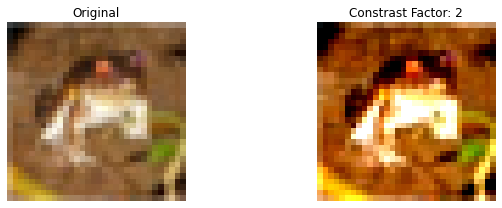

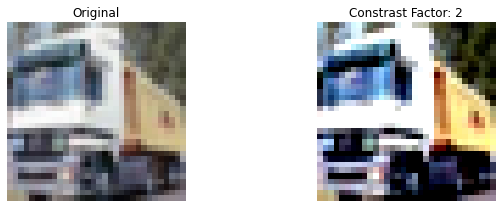

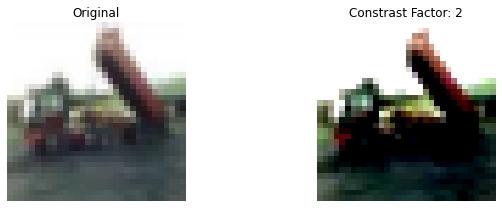

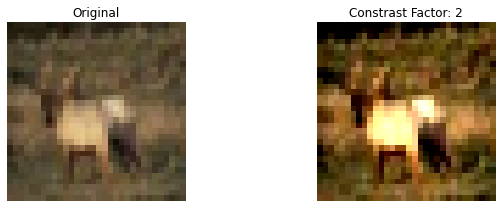

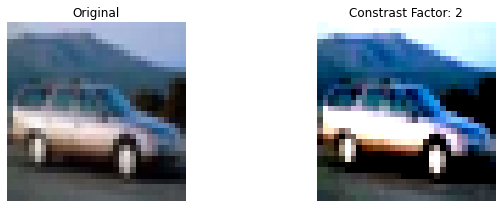

In [5]:
i=0
for constrasted_image in train_contrasted_images:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(train_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==5:
        break
    

# Combining original and contrasted images

In [6]:
original_image_labels = np.zeros(len(train_dataset.data))
contrasted_image_labels = np.ones(len(train_contrasted_images))

test_original_image_labels = np.zeros(len(test_dataset.data))
test_contrasted_image_labels = np.ones(len(test_contrasted_images))

train_original_and_contrasted_images = np.concatenate((train_dataset.data, train_contrasted_images), axis=0)
train_contrast_labels = np.concatenate((original_image_labels, contrasted_image_labels), axis=None)
train_image_labels = np.concatenate((train_dataset.targets, train_dataset.targets), axis=None)

test_original_and_contrasted_images = np.concatenate((test_dataset.data, test_contrasted_images), axis=0)
test_contrast_labels = np.concatenate((test_original_image_labels, test_contrasted_image_labels), axis=None)


print("Combined contrasted and original train images shape")
print(train_original_and_contrasted_images.shape)


Combined contrasted and original train images shape
(100000, 32, 32, 3)


# Combining Contrasted Images with the Label in a Way that Contrast Gets Correlated with Label

In [7]:
# contrasted = 1
# not_contrasted = 0

train_labels = np.array(train_dataset.targets)
test_labels = np.array(test_dataset.targets)

# Extracting indeces of images that should be contrasted for each label
train_indeces_95_percent_contrasted_label_0 = np.where(train_labels == 0)[0][:int(len(train_labels[train_labels==0])*0.95)]
train_indeces_95_percent_contrasted_label_1 = np.where(train_labels == 1)[0][:int(len(train_labels[train_labels==1])*0.95)]
train_indeces_95_percent_contrasted_label_2 = np.where(train_labels == 2)[0][:int(len(train_labels[train_labels==2])*0.95)]
train_indeces_95_percent_contrasted_label_3 = np.where(train_labels == 3)[0][:int(len(train_labels[train_labels==3])*0.95)]
train_indeces_95_percent_contrasted_label_4 = np.where(train_labels == 4)[0][:int(len(train_labels[train_labels==4])*0.95)]

train_indeces_5_percent_contrasted_label_5 = np.where(train_labels == 5)[0][:int(len(train_labels[train_labels==5])*0.05)]
train_indeces_5_percent_contrasted_label_6 = np.where(train_labels == 6)[0][:int(len(train_labels[train_labels==6])*0.05)]
train_indeces_5_percent_contrasted_label_7 = np.where(train_labels == 7)[0][:int(len(train_labels[train_labels==7])*0.05)]
train_indeces_5_percent_contrasted_label_8 = np.where(train_labels == 8)[0][:int(len(train_labels[train_labels==8])*0.05)]
train_indeces_5_percent_contrasted_label_9 = np.where(train_labels == 9)[0][:int(len(train_labels[train_labels==9])*0.05)]


test_indeces_50_percent_contrasted_label_0 = np.where(test_labels == 0)[0][:int(len(test_labels[test_labels==0])*0.5)]
test_indeces_50_percent_contrasted_label_1 = np.where(test_labels == 1)[0][:int(len(test_labels[test_labels==1])*0.5)]
test_indeces_50_percent_contrasted_label_2 = np.where(test_labels == 2)[0][:int(len(test_labels[test_labels==2])*0.5)]
test_indeces_50_percent_contrasted_label_3 = np.where(test_labels == 3)[0][:int(len(test_labels[test_labels==3])*0.5)]
test_indeces_50_percent_contrasted_label_4 = np.where(test_labels == 4)[0][:int(len(test_labels[test_labels==4])*0.5)]
test_indeces_50_percent_contrasted_label_5 = np.where(test_labels == 5)[0][:int(len(test_labels[test_labels==5])*0.5)]
test_indeces_50_percent_contrasted_label_6 = np.where(test_labels == 6)[0][:int(len(test_labels[test_labels==6])*0.5)]
test_indeces_50_percent_contrasted_label_7 = np.where(test_labels == 7)[0][:int(len(test_labels[test_labels==7])*0.5)]
test_indeces_50_percent_contrasted_label_8 = np.where(test_labels == 8)[0][:int(len(test_labels[test_labels==8])*0.5)]
test_indeces_50_percent_contrasted_label_9 = np.where(test_labels == 9)[0][:int(len(test_labels[test_labels==9])*0.5)]










all_indeces_to_be_contrasted_train = np.concatenate((train_indeces_95_percent_contrasted_label_0, train_indeces_95_percent_contrasted_label_1,
                                                     train_indeces_95_percent_contrasted_label_2,train_indeces_95_percent_contrasted_label_3,
                                                     train_indeces_95_percent_contrasted_label_4,train_indeces_5_percent_contrasted_label_5, 
                                                     train_indeces_5_percent_contrasted_label_6,train_indeces_5_percent_contrasted_label_7, 
                                                     train_indeces_5_percent_contrasted_label_8, train_indeces_5_percent_contrasted_label_9), axis=None)


all_indeces_to_be_contrasted_test = np.concatenate((test_indeces_50_percent_contrasted_label_0, test_indeces_50_percent_contrasted_label_1,
                                                     test_indeces_50_percent_contrasted_label_2,test_indeces_50_percent_contrasted_label_3,
                                                     test_indeces_50_percent_contrasted_label_4,test_indeces_50_percent_contrasted_label_5, 
                                                     test_indeces_50_percent_contrasted_label_6,test_indeces_50_percent_contrasted_label_7, 
                                                     test_indeces_50_percent_contrasted_label_8, test_indeces_50_percent_contrasted_label_9), axis=None)





In [8]:
all_train_images_to_be_contrasted = train_dataset.data[all_indeces_to_be_contrasted_train]
all_test_images_to_be_contrasted = test_dataset.data[all_indeces_to_be_contrasted_test]

contrasted_train_images = apply_contrast(all_train_images_to_be_contrasted, contrast_factor)
contrasted_test_images = apply_contrast(all_test_images_to_be_contrasted, contrast_factor)

contrasted_train_images = np.array(np.stack([transforms.ToPILImage()(im) for im in contrasted_train_images]))
contrasted_test_images = np.array(np.stack([transforms.ToPILImage()(im) for im in contrasted_test_images]))

print("Train contrast adjusted images shape")
print(contrasted_train_images.shape)

print("Test contrast adjusted images shape")
print(contrasted_test_images.shape)


Train contrast adjusted images shape
(25000, 32, 32, 3)
Test contrast adjusted images shape
(5000, 32, 32, 3)


In [9]:
all_original_train_images = np.array(train_dataset.data)
all_original_test_images = np.array(test_dataset.data)

all_original_train_labels = np.array(train_dataset.targets)
all_original_test_labels = np.array(test_dataset.targets)

labels_for_contrasted_train_images = all_original_train_labels[all_indeces_to_be_contrasted_train]
labels_for_uncontrasted_train_images = np.delete(all_original_train_labels, all_indeces_to_be_contrasted_train)

labels_for_contrasted_test_images = all_original_test_labels[all_indeces_to_be_contrasted_test]
labels_for_uncontrasted_test_images = np.delete(all_original_test_labels, all_indeces_to_be_contrasted_test)

uncontrasted_train_images = np.delete(all_original_train_images, all_indeces_to_be_contrasted_train, axis=0)

uncontrasted_test_images = np.delete(all_original_test_images, all_indeces_to_be_contrasted_test, axis=0)

train_contrasted_and_uncontrasted_images = np.concatenate((contrasted_train_images, uncontrasted_train_images), axis=0)
train_contrasted_and_uncontrasted_labels = np.concatenate((labels_for_contrasted_train_images, labels_for_uncontrasted_train_images), axis=None)

test_contrasted_and_uncontrasted_images = np.concatenate((contrasted_test_images, uncontrasted_test_images), axis=0)
test_contrasted_and_uncontrasted_labels = np.concatenate((labels_for_contrasted_test_images, labels_for_uncontrasted_test_images), axis=None)

test_contrasted_and_uncontrasted_images.shape



(10000, 32, 32, 3)

# Extract image features

In [10]:
from image_feature_extractor import Img2Vec

img2vec = Img2Vec(model="resnet50")

batch_size = 64

def get_features(images, batch_size):
    Z_list = []
    for first in range(0, len(images), batch_size):
        images_subset = images[first:first+batch_size]
        Z_subset = img2vec.get_vec(images_subset)
        Z_list.append(Z_subset)
    Z = np.vstack(Z_list)
    return Z

In [11]:
# Z = get_features(train_original_and_contrasted_images, batch_size)
# Z_test = get_features(test_original_and_contrasted_images, batch_size)
# Z_test_original = get_features(test_dataset.data, batch_size)
# Z_test_contrasted = get_features(test_contrasted_images, batch_size)


# print("Shape of extracted features for combined contrasted and original images")
# print(Z.shape)

# print("Shape of extracted features for original test images")
# print(Z_test_original.shape)

# print("Shape of extracted features for contrasted test images")
# print(Z_test_contrasted.shape)



Z_train_contrast_correlated_with_label = get_features(train_contrasted_and_uncontrasted_images, batch_size)

Z_test_contrast_correlated_with_label = get_features(test_contrasted_and_uncontrasted_images, batch_size)

print("Shape of Z_train_contrast_correlated_with_label")
print(Z_train_contrast_correlated_with_label.shape)

print("Shape of test_contrasted_and_uncontrasted_images")
print(Z_test_contrast_correlated_with_label.shape)


Shape of Z_train_contrast_correlated_with_label
(50000, 2048)
Shape of test_contrasted_and_uncontrasted_images
(10000, 2048)


In [12]:
from numpy import save
# # save to npy file
# save('Z.npy', Z)
# save('Z_test.npy', Z_test)
# save('Z_test_original.npy', Z_test_original)
# save('Z_test_contrasted.npy', Z_test_contrasted)
save('Z_train_contrast_correlated_with_label.npy', Z_train_contrast_correlated_with_label)
save('Z_test_contrast_correlated_with_label.npy', Z_test_contrast_correlated_with_label)


In [13]:
from numpy import load
# load array
Z = load('Z.npy')
Z_test = load('Z_test.npy')
Z_test_original = load('Z_test_original.npy')
Z_test_contrasted = load('Z_test_contrasted.npy')
# Z_train_contrast_correlated_with_label = load('Z_train_contrast_correlated_with_label.npy')
# Z_test_contrast_correlated_with_label = load('Z_test_contrast_correlated_with_label.npy')



print("Shape of extracted features for combined contrasted and original images")
print(Z.shape)

print("Shape of extracted features for original test images")
print(Z_test_original.shape)

print("Shape of extracted features for contrasted test images")
print(Z_test_contrasted.shape)

# print("Shape of extracted features Z_train_contrast_correlated_with_label")
# print(Z_train_contrast_correlated_with_label.shape)

# print("Shape of extracted features Z_test_contrast_correlated_with_label")
# print(Z_test_contrast_correlated_with_label.shape)


Shape of extracted features for combined contrasted and original images
(100000, 2048)
Shape of extracted features for original test images
(10000, 2048)
Shape of extracted features for contrasted test images
(10000, 2048)


# Obtaining contrast prediction coefficients and contrast prediction accuracy

In [14]:
# Using sklearn Logistic Regression
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=0).fit(Z, train_contrast_labels)

contrast_coefficients = lr_model.coef_.reshape(-1,1)
contrast_coefficients = contrast_coefficients / np.linalg.norm(contrast_coefficients)

print("Contrast coefficients shape")
print(contrast_coefficients.shape)

print('Contrast prediction accuracy on training data-rotated and original combined: ', lr_model.score(Z, train_contrast_labels))
print('Contrast prediction accuracy on test data-rotated and original combined: ', lr_model.score(Z_test, test_contrast_labels))

    


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Contrast coefficients shape
(2048, 1)
Contrast prediction accuracy on training data-rotated and original combined:  0.97125
Contrast prediction accuracy on test data-rotated and original combined:  0.9654


# Prediction Accuracies on extracted image features Z ( features obtained from the feature extractor)

### Logistic Regression

In [15]:
# Trained on original extracted image features Z, tested on contrasted extracted image features Z
from sklearn.linear_model import LogisticRegression

import torch
from sklearn import preprocessing


# targets_train = np.array(train_dataset.targets) 
targets_train = train_image_labels[:len(train_image_labels)//2]
targets_train2 = train_contrasted_and_uncontrasted_labels
targets_test = np.array(test_dataset.targets)
targets_test2 = test_contrasted_and_uncontrasted_labels

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(Z[:len(Z)//2,:], targets_train)

logistic_regression_model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(Z_train_contrast_correlated_with_label, targets_train2)


print('LR Accuracy on test data - Z original features: ',logistic_regression_model.score(Z_test_original, targets_test))
# print('LR Accuracy on test data - Z contrasted features: ', logistic_regression_model.score(Z_test_contrasted, targets_test))
print('LR Accuracy on test data - Z - contrast correlated with label: ', logistic_regression_model2.score(Z_test_contrast_correlated_with_label, targets_test2))



/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

LR Accuracy on test data - Z original features:  0.902
LR Accuracy on test data - Z - contrast correlated with label:  0.8146


# Find L, get F features, plot histograms and perform predictions

Results for lamda  0.001

Histogram for F Test feature  0


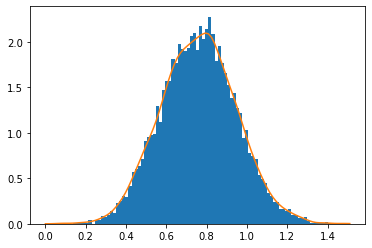

Histogram for F Test feature  1


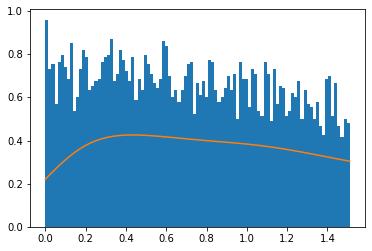

Histogram for F Test feature  2


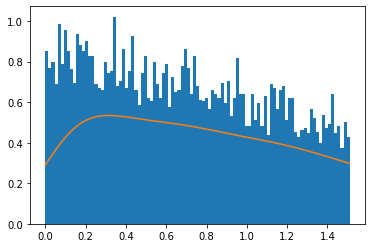

Histogram for F Test feature  3


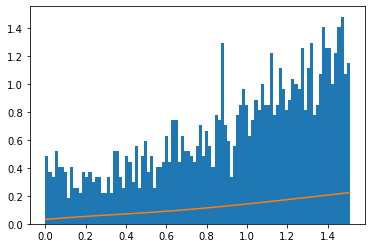

Histogram for F Test feature  4


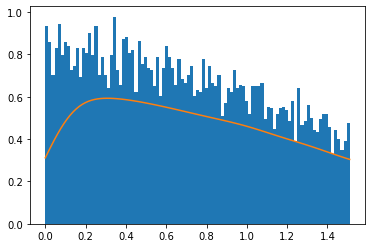

Histogram for F Test feature  5


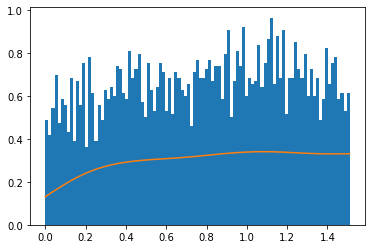

Histogram for F Test feature  6


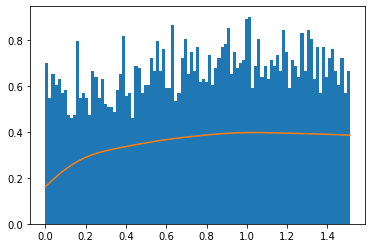

Histogram for F Test feature  7


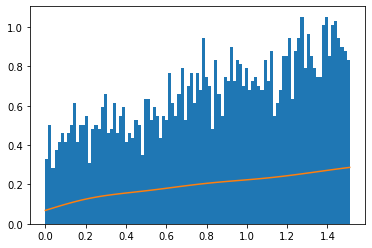

Histogram for F Test feature  8


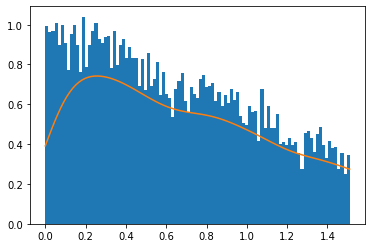

Histogram for F Test feature  9


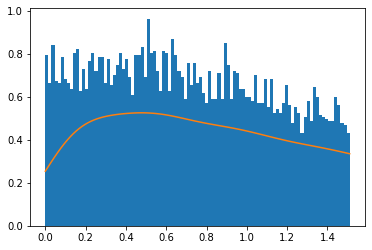

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8975
LR Accuracy on test data - All F features - contrast correlated with label:  0.8092



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8966
Logistic Regression Accuracy on test data - contrast correlated with label:  0.812


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8977
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8116


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8919
Logistic Regression Accuracy on test data - contrast correlated with label:  0.804


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8907
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8053


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8937
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8021









Results for lamda  0.01

Histogram for F Test feature  0


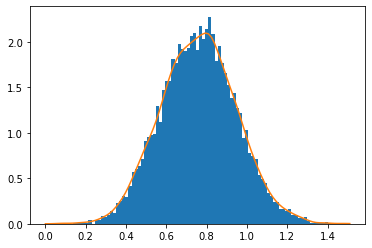

Histogram for F Test feature  1


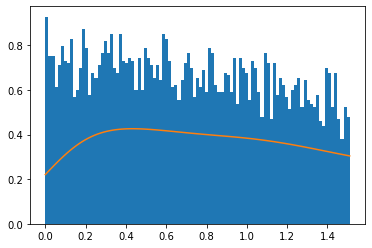

Histogram for F Test feature  2


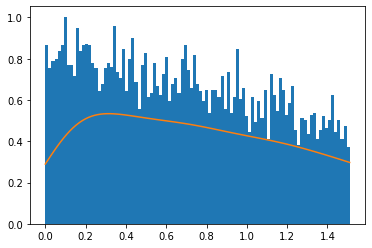

Histogram for F Test feature  3


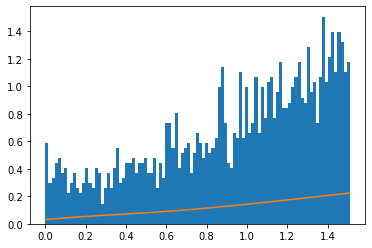

Histogram for F Test feature  4


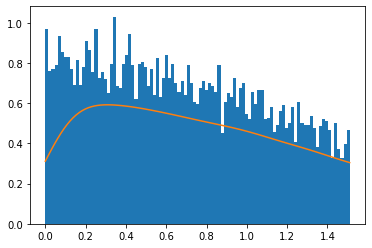

Histogram for F Test feature  5


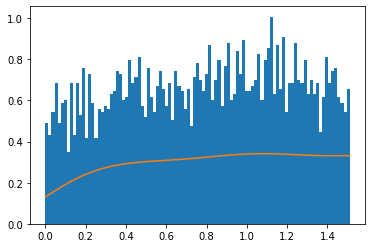

Histogram for F Test feature  6


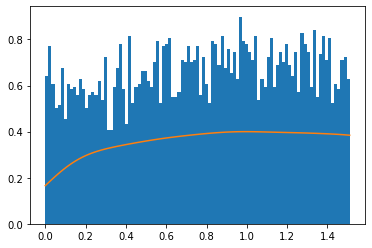

Histogram for F Test feature  7


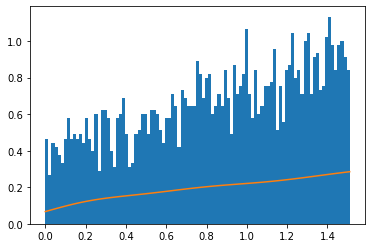

Histogram for F Test feature  8


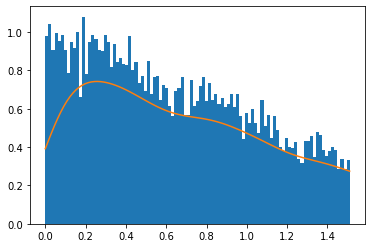

Histogram for F Test feature  9


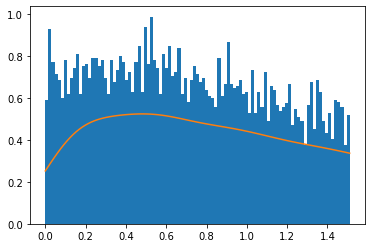

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8964
LR Accuracy on test data - All F features - contrast correlated with label:  0.8098



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8971
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8117


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8983
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8116


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8919
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8044


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8912
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8028


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8933
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8027









Results for lamda  10

Histogram for F Test feature  0


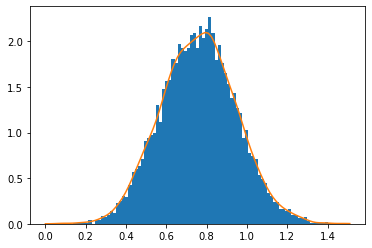

Histogram for F Test feature  1


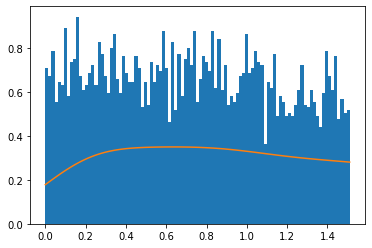

Histogram for F Test feature  2


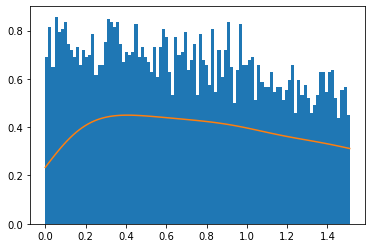

Histogram for F Test feature  3


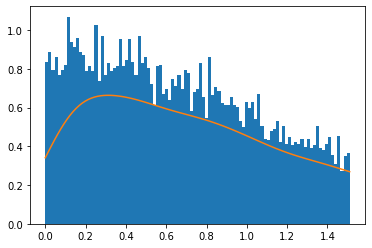

Histogram for F Test feature  4


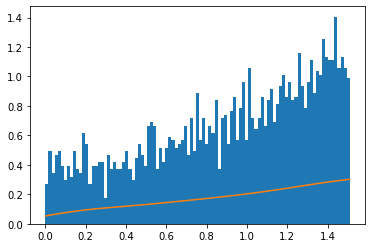

Histogram for F Test feature  5


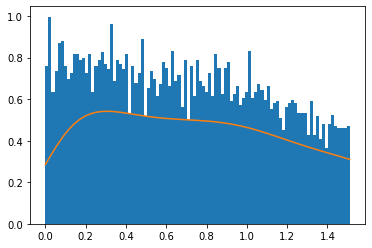

Histogram for F Test feature  6


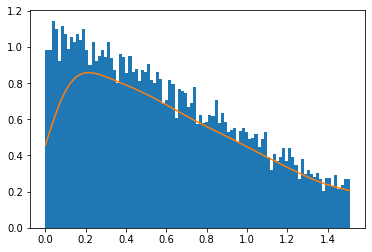

Histogram for F Test feature  7


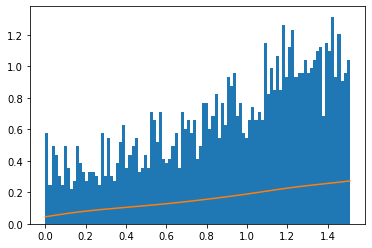

Histogram for F Test feature  8


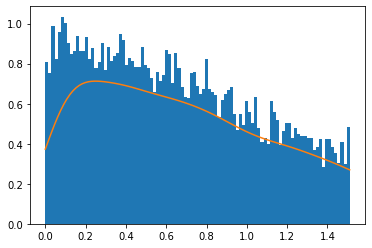

Histogram for F Test feature  9


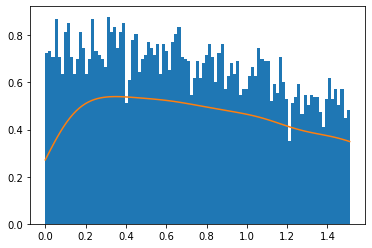

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8859
LR Accuracy on test data - All F features - contrast correlated with label:  0.7944



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8852
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7977


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8934
Logistic Regression Accuracy on test data - contrast correlated with label:  0.8002


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8788
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7854


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8795
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7803


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8807
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7934









Results for lamda  100

Histogram for F Test feature  0


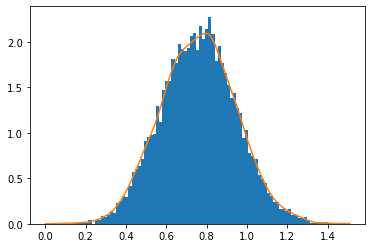

Histogram for F Test feature  1


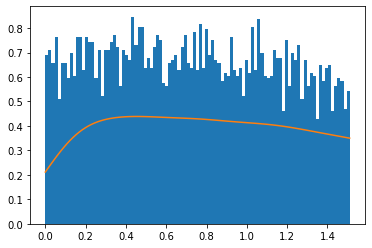

Histogram for F Test feature  2


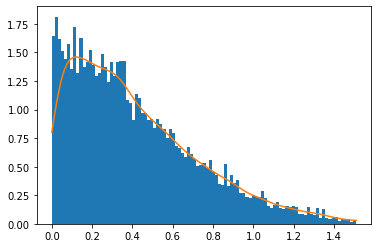

Histogram for F Test feature  3


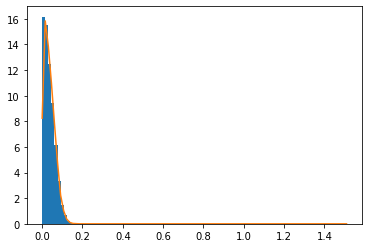

Histogram for F Test feature  4


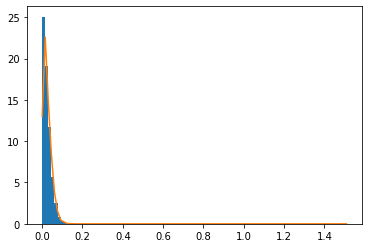

Histogram for F Test feature  5


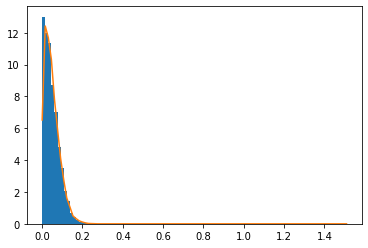

Histogram for F Test feature  6


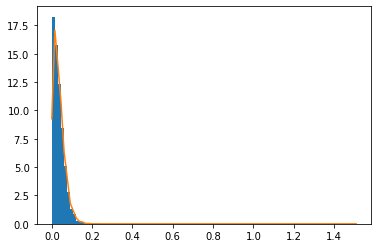

Histogram for F Test feature  7


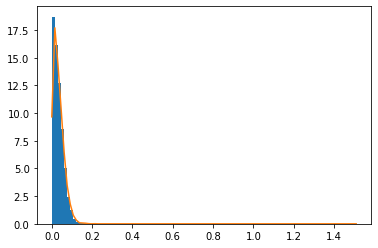

Histogram for F Test feature  8


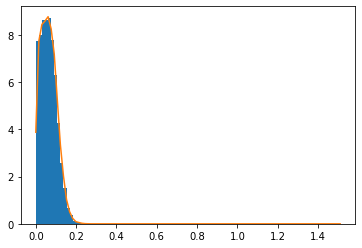

Histogram for F Test feature  9


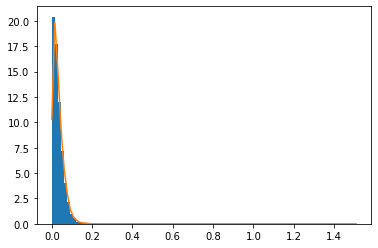

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8585
LR Accuracy on test data - All F features - contrast correlated with label:  0.7339



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8538
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7636


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8658
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7532


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8576
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7429


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8567
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7398


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.859
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7322









Results for lamda  1000

Histogram for F Test feature  0


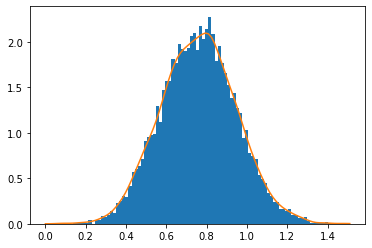

Histogram for F Test feature  1


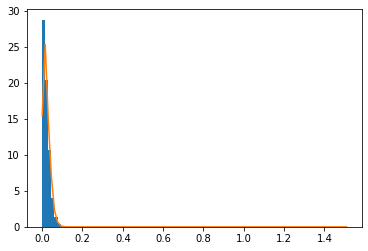

Histogram for F Test feature  2


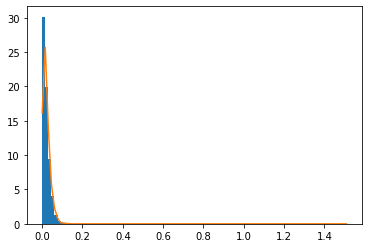

Histogram for F Test feature  3


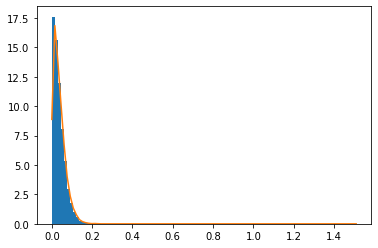

Histogram for F Test feature  4


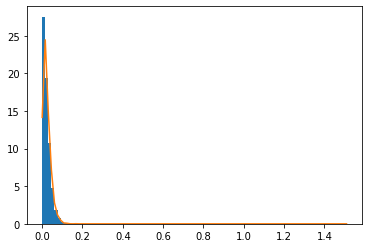

Histogram for F Test feature  5


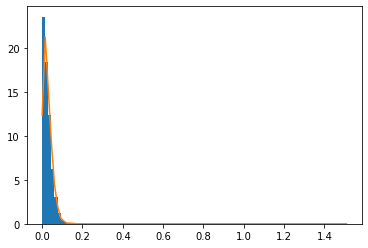

Histogram for F Test feature  6


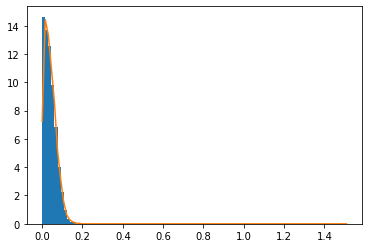

Histogram for F Test feature  7


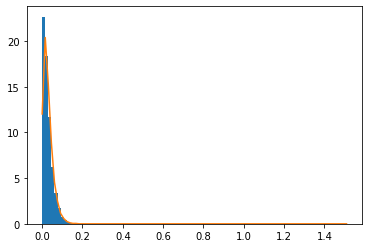

Histogram for F Test feature  8


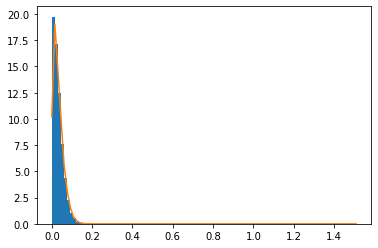

Histogram for F Test feature  9


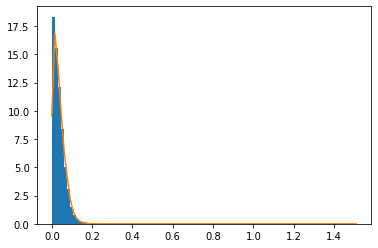

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8377
LR Accuracy on test data - All F features - contrast correlated with label:  0.7042



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8374
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7471


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8382
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7021


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8378
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7042


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8365
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7025


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8368
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7043









Results for lamda  100000

Histogram for F Test feature  0


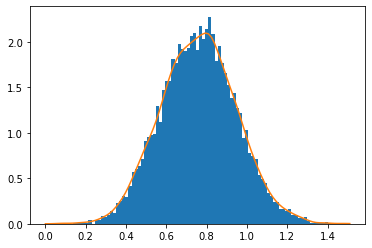

Histogram for F Test feature  1


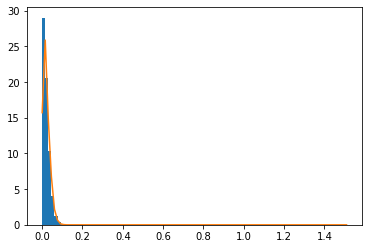

Histogram for F Test feature  2


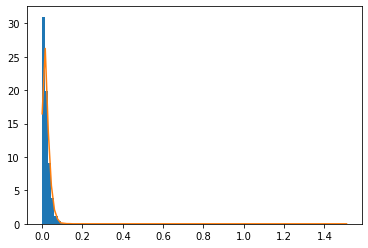

Histogram for F Test feature  3


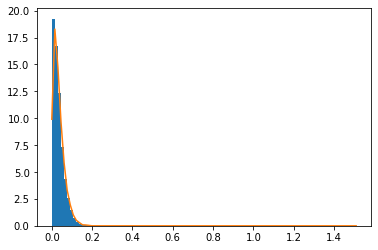

Histogram for F Test feature  4


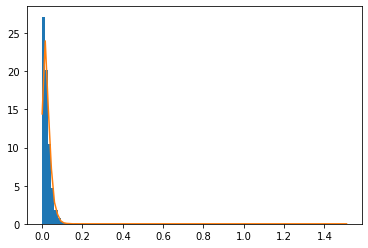

Histogram for F Test feature  5


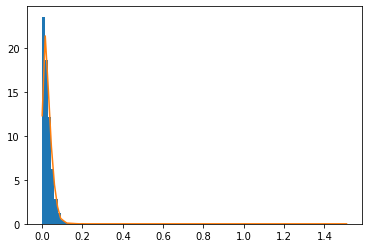

Histogram for F Test feature  6


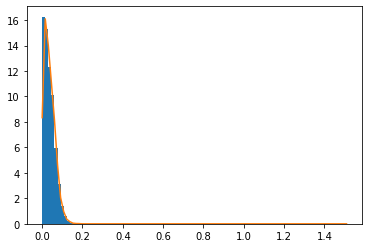

Histogram for F Test feature  7


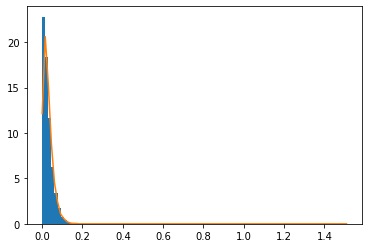

Histogram for F Test feature  8


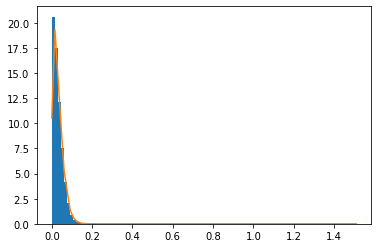

Histogram for F Test feature  9


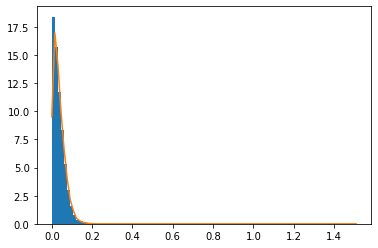

/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.832
LR Accuracy on test data - All F features - contrast correlated with label:  0.6948



Accuracy for without F feature  0


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8314
Logistic Regression Accuracy on test data - contrast correlated with label:  0.7402


Accuracy for without F feature  1


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8318
Logistic Regression Accuracy on test data - contrast correlated with label:  0.6939


Accuracy for without F feature  2


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8314
Logistic Regression Accuracy on test data - contrast correlated with label:  0.6936


Accuracy for without F feature  3


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8314
Logistic Regression Accuracy on test data - contrast correlated with label:  0.6944


Accuracy for without F feature  4


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy on test data - both train and test not contrasted:  0.8313
Logistic Regression Accuracy on test data - contrast correlated with label:  0.693











/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import pandas as pd
from scipy import stats
# Computing M
lamdas = [0.001,0.01,10,100,1000,100000]

for lamda in lamdas:
    print("Results for lamda ", lamda)
    print()
    k = int(Z.shape[1]*0.2) # % of original number of features
    n = Z.shape[0]
    delta_Z_matrix = np.absolute((Z[:int(len(train_contrast_labels)/2),:] - Z[int(len(train_contrast_labels)/2):,:]))
    M = - Z.T @ Z/n + lamda * delta_Z_matrix.T @ delta_Z_matrix / (n // 2 ) 


    # Computing the term on which we perform SVD
    alpha_alpha_T = contrast_coefficients @ contrast_coefficients.T
    d = alpha_alpha_T.shape[0]
    I = np.identity(d)
    I_minus_alpa_alpha_T = I-alpha_alpha_T
    term_for_SVD = (I_minus_alpa_alpha_T @ M) @ I_minus_alpa_alpha_T


    # Performing SVD to get eigenvectors and eigenvalues
    from numpy import linalg as LA
    eigenvalues, eigenvectors = LA.eigh(term_for_SVD)
#     print("Printing eigenvalues")
#     print(eigenvalues.shape)
#     print(eigenvalues)
#     print("Printing eigenvectors")
#     display(eigenvectors.shape)
#     display(eigenvectors)

    # Forming L from eigenvectors and alpha
    L_1 = contrast_coefficients
    least_k_eigen_values = eigenvalues[:k]
    least_k_eigen_values[np.absolute(least_k_eigen_values)<0.000001]=0

#     print("Printing least k eigenvalues before removing the zero eigenvalue")
#     print(least_k_eigen_values)

    non_zero_indeces = None
    if 0 in least_k_eigen_values:
        non_zero_indeces = np.nonzero(least_k_eigen_values)[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[non_zero_indeces]
#         print("Printing least k-1 eigenvalues after removing the zero eigenvalue")
#         print(least_k_eigen_values_without_0)

    else:
        non_zero_indeces = np.nonzero(least_k_eigen_values[:k-1])[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[:k-1]
#         print("Printing least k-1 eigenvalues after removing the zero eigenvalue")
#         print(least_k_eigen_values_without_0)

#     print("Printing non zero indeces of the least k-1 eigenvalues") 
#     print(non_zero_indeces) #

    L_2 = eigenvectors[:,non_zero_indeces]

    # print(L_2.shape)

    L = np.concatenate((L_1, L_2), axis=1)

   
    # Obtaining F_test values from extracted image features using numpy's linalg.lstsq function.
    F_train_original = torch.from_numpy(np.linalg.lstsq(L, Z[:len(Z)//2,:].transpose(), rcond=None)[0].transpose())
    F_train_contrast_correlated_with_label = torch.from_numpy(np.linalg.lstsq(L, Z_train_contrast_correlated_with_label.transpose(), rcond=None)[0].transpose())
    F_test_original = torch.from_numpy(np.linalg.lstsq(L, Z_test_original.transpose(), rcond=None)[0].transpose())
    F_test_contrasted = torch.from_numpy(np.linalg.lstsq(L, Z_test_contrasted.transpose(), rcond=None)[0].transpose())
    F_test_contrast_correlated_with_label = torch.from_numpy(np.linalg.lstsq(L, Z_test_contrast_correlated_with_label.transpose(), rcond=None)[0].transpose())



    # Plot histograms

    # the difference between F_test_green and F_test_red
    delta_matrix = np.absolute(F_test_original.detach().numpy() - F_test_contrasted.detach().numpy())

#     print("Printing the delta matrix")
    delta_matrix_df = pd.DataFrame(delta_matrix)
#     display(delta_matrix_df.head())

    # Plotting the histograms for each feature in the delta matrix # 100 bins
    for i in range(10): #(len(delta_matrix_df.columns)): 
        print("Histogram for F Test feature ", i)    
        feature = delta_matrix_df.iloc[:,i].values
        density = stats.gaussian_kde(feature)
        n, x, _ = plt.hist(feature, bins=np.linspace(0, np.amax(delta_matrix_df.iloc[:,0]), 100), 
                           histtype='bar', density=True)  
        plt.plot(x, density(x))
        plt.show()
        
                
    
    
    
    # Trained on original images, tested on contrasted images: all Features in F_test
    from sklearn.linear_model import LogisticRegression

    import torch
    from sklearn import preprocessing
    from sklearn.neighbors import KNeighborsClassifier #

    X_torch_train = F_train_original
    X_torch_train2 = F_train_contrast_correlated_with_label
    X_torch_test = F_test_contrasted
    X_torch_test2 = F_test_contrast_correlated_with_label
    X_torch_test_within = F_test_original
    
    targets_train = train_image_labels[:len(train_image_labels)//2]
    targets_train2 = train_contrasted_and_uncontrasted_labels
#     targets_test = np.array(test_dataset.targets)
    targets_test2 = test_contrasted_and_uncontrasted_labels
    targets_test_within = np.array(test_dataset.targets)

    logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(X_torch_train.detach().numpy(), targets_train)
    logistic_regression_model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(X_torch_train2.detach().numpy(), targets_train2)

    print('Logistic Regression Accuracy on test data - both train and test not contrasted: ',logistic_regression_model.score(X_torch_test_within, targets_test_within))
#     print('LR Accuracy on test data - contrasted - All F features: ', logistic_regression_model.score(X_torch_test.detach().numpy(), targets_test))
    print('LR Accuracy on test data - All F features - contrast correlated with label: ', logistic_regression_model2.score(X_torch_test2.detach().numpy(), targets_test2))

    print("\n"*2)
    

    # Trained on original images, tested on contrasted images: Contrast Features removed from F_test

    targets_train = train_image_labels[:len(train_image_labels)//2]
    targets_test = np.array(test_dataset.targets)
    targets_test_within = np.array(test_dataset.targets)

    for i in range(5): #(F_test_original.detach().numpy().shape[1]):
        print("Accuracy for without F feature ",i)

        X_torch_train = F_train_original.detach().numpy().copy()
        X_torch_test = F_test_contrasted.detach().numpy().copy()
        X_torch_test_within = F_test_original.detach().numpy().copy()

        X_torch_train = np.delete(X_torch_train, i, 1)
        X_torch_test = np.delete(X_torch_test, i, 1)
        X_torch_test_within = np.delete(X_torch_test_within, i, 1)
       
        X_torch_train2 = F_train_contrast_correlated_with_label
        X_torch_test2 = F_test_contrast_correlated_with_label

        X_torch_train2 = np.delete(X_torch_train2, i, 1)
        X_torch_test2 = np.delete(X_torch_test2, i, 1)
        


        logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(X_torch_train, targets_train)
        logistic_regression_model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0).fit(X_torch_train2.detach().numpy(), targets_train2)

        
        print('Logistic Regression Accuracy on test data - both train and test not contrasted: ',logistic_regression_model.score(X_torch_test_within, targets_test_within))
#         print('Logistic Regression Accuracy on test data - contrasted: ', logistic_regression_model.score(X_torch_test, targets_test))
        print('Logistic Regression Accuracy on test data - contrast correlated with label: ', logistic_regression_model2.score(X_torch_test2.detach().numpy(), targets_test2))
        
        print("\n"*1)
    print("\n"*6)

